# Getting Started with DocRag

Welcome to DocRag! This tutorial will guide you through the basics of using the DocRag package to extract and analyze content from PDF documents using AI-powered document layout analysis.

## What is DocRag?

DocRag is a powerful Python package that uses computer vision and large language models to intelligently parse PDF documents. It can:

- **Extract document structure**: Automatically identify figures, tables, formulas, text blocks, and titles
- **Generate markdown**: Convert PDF content to clean, structured markdown format
- **Parse content**: Use AI models to understand and describe visual elements like figures and tables
- **Maintain layout**: Preserve the logical reading order of document elements

## How it Works

The DocSearch workflow consists of three main steps:

1. **PDF to Images**: Convert PDF pages to high-resolution images
2. **Layout Analysis**: Use YOLO-based computer vision models to detect and classify document elements (figures, tables, text, etc.)
3. **Content Parsing**: Use large language models (like Google Gemini) to extract and describe the content of each element

## The Document Class Architecture

The core of DocSearch is built around two main classes:

- **`Document`**: Represents an entire PDF document containing multiple pages
- **`Page`**: Represents a single page with its detected elements

Each page contains multiple **`Element`** objects that represent different types of content:
- **Figures**: Images, charts, diagrams
- **Tables**: Structured data tables  
- **Formulas**: Mathematical equations
- **Text**: Regular paragraph text
- **Titles**: Section headers and titles

## Setting Up Google Gemini API Key

DocSearch uses Google's Gemini AI model for intelligent content parsing. To use this feature, you'll need to obtain a free API key:

### Step 1: Get Your API Key

1. Go to [Google AI Studio](https://aistudio.google.com/app/prompts/new_chat)
2. Click on **"Get API key"** button
3. Sign in with your Google account if prompted
4. Copy your API key

### Step 2: Set Environment Variable

Once you have your API key, you need to set it as an environment variable. You can do this in several ways:

**Option A: Set in Jupyter Notebook (temporary)**
```python
import os
os.environ['GEMINI_API_KEY'] = 'your-api-key-here'
```

**Option B: Set in your system permanently**
- **Windows**: Add `GEMINI_API_KEY=your-api-key-here` to your environment variables
- **Mac/Linux**: Add `export GEMINI_API_KEY=your-api-key-here` to your `.bashrc` or `.zshrc`

**Option C: Use a .env file**
Create a `.env` file in your project directory:
```
GEMINI_API_KEY=your-api-key-here
```

⚠️ **Important**: Never commit your API key to version control. Keep it secure and private!


## Installation and Setup

First, let's import the necessary libraries and set up our environment:


In [1]:

!pip install doclayout-yolo
!pip install rich
!pip install pyarrow
!pip install aiolimiter
!pip install google-genai
!pip install docrag
!pip install huggingface_hub[hf_transfer,cli]

In [2]:
import os
from pathlib import Path
from IPython.display import display, Markdown
from rich.console import Console
from rich.markdown import Markdown as RichMarkdown

# Import the main DocSearch classes
from docrag import Document
from docrag.core.page import Page

# Set up your Google Gemini API key here (replace with your actual key)
# os.environ['GEMINI_API_KEY'] = 'your-api-key-here'

console = Console()
print("✅ DocSearch imported successfully!")

c:\Users\lllang\miniconda3\envs\fresh\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ DocSearch imported successfully!


In [3]:
# Set up directories
ROOT_DIR = Path(os.path.abspath("."))
DATA_DIR = ROOT_DIR / "data"

# For this tutorial, we'll use a sample PDF path
# Replace this with the path to your PDF file
PDF_PATH = ROOT_DIR / "sample_document.pdf"  # Update this to your PDF file

print(f"Root directory: {ROOT_DIR}")
print(f"Data directory: {DATA_DIR}")
print(f"PDF path: {PDF_PATH}")

# Check if data directory exists, create if not
DATA_DIR.mkdir(exist_ok=True)
print(f"✅ Setup complete!")

Root directory: c:\Users\lllang\Desktop\Current_Projects\DocRag\examples
Data directory: c:\Users\lllang\Desktop\Current_Projects\DocRag\examples\data
PDF path: c:\Users\lllang\Desktop\Current_Projects\DocRag\examples\sample_document.pdf
✅ Setup complete!


## Creating a Document from PDF

The main entry point for DocSearch is the `Document.from_pdf()` method. This method:

1. **Converts** the PDF to high-resolution images (one per page)
2. **Analyzes** each page using computer vision to detect elements 
3. **Parses** the content using AI models to extract text and descriptions
4. **Returns** a Document object containing all the processed information

### Key Parameters:

- **`pdf_path`**: Path to your PDF file
- **`dpi`**: Resolution for PDF conversion (default: 300, higher = better quality but slower)
- **`model_weights`**: YOLO model for layout detection (auto-downloaded if not present)
- **`verbose`**: Whether to show progress information

Let's create a Document from a PDF file:

In [4]:
# Create a Document from PDF
# Note: Make sure you have set GEMINI_API_KEY environment variable
# and replace PDF_PATH with the path to your actual PDF file
if PDF_PATH.exists():
    print(f"📄 PDF file exists: {PDF_PATH}")
else:
    print(f"❌ PDF file does not exist: {PDF_PATH}")

print(f"📄 Processing PDF: {PDF_PATH}")
print("This may take a few minutes depending on the document size...")

# Create the document
doc = Document.from_pdf(
    pdf_path=PDF_PATH,
    dpi=200,  # Lower DPI for faster processing in tutorial
    verbose=True
)

print(f"✅ Document created successfully!")
print(f"📊 Document contains {len(doc)} pages")


📄 PDF file exists: c:\Users\lllang\Desktop\Current_Projects\DocRag\examples\sample_document.pdf
📄 Processing PDF: c:\Users\lllang\Desktop\Current_Projects\DocRag\examples\sample_document.pdf
This may take a few minutes depending on the document size...
Extracting pages from PDF at 200 DPI...
Extracted 30 pages

0: 1024x736 3 titles, 10 plain texts, 2 figures, 875.7ms
Speed: 6.0ms preprocess, 875.7ms inference, 2.0ms postprocess per image at shape (1, 3, 1024, 736)

0: 1024x736 1 title, 3 plain texts, 1 table, 833.2ms
Speed: 6.0ms preprocess, 833.2ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 736)

0: 1024x736 3 titles, 6 plain texts, 984.4ms
Speed: 5.0ms preprocess, 984.4ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 736)

0: 1024x736 2 titles, 3 plain texts, 1 figure, 861.2ms
Speed: 5.0ms preprocess, 861.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 736)

0: 1024x736 2 plain texts, 1 figure, 871.5ms
Speed: 5.0ms preprocess, 871.5ms

## Exploring Document Content

Once you have created a Document, you can access various types of information. The Document class provides several convenient properties and methods to explore the content:

### Document-Level Properties

- **`doc.pages`**: List of Page objects
- **`doc.figures`**: All figures from all pages
- **`doc.tables`**: All tables from all pages  
- **`doc.formulas`**: All mathematical formulas
- **`doc.text`**: All text blocks
- **`doc.titles`**: All title/header elements
- **`doc.elements`**: All detected elements
- **`doc.markdown`**: Complete document as markdown

Let's explore the content of our document:


In [6]:

print("📊 Document Overview:")
print(f"   Number of pages: {len(doc)}")
print(f"   Total figures: {len(doc.figures)}")
print(f"   Total tables: {len(doc.tables)}")
print(f"   Total formulas: {len(doc.formulas)}")
print(f"   Total text blocks: {len(doc.text)}")
print(f"   Total titles: {len(doc.titles)}")
print(f"   Total elements: {len(doc.elements)}")

print("\n" + "="*50)
print("📄 Page-by-Page Breakdown:")

for i, page in enumerate(doc.pages()):
    print(f"\nPage {i+1}:")
    print(f"   Figures: {len(page.figures)}")
    print(f"   Tables: {len(page.tables)}")
    print(f"   Formulas: {len(page.formulas)}")
    print(f"   Text blocks: {len(page.text)}")
    print(f"   Titles: {len(page.titles)}")


📊 Document Overview:
   Number of pages: 30
   Total figures: 24
   Total tables: 6
   Total formulas: 0
   Total text blocks: 146
   Total titles: 50
   Total elements: 226

📄 Page-by-Page Breakdown:

Page 1:
   Figures: 2
   Tables: 0
   Formulas: 0
   Text blocks: 10
   Titles: 3

Page 2:
   Figures: 0
   Tables: 1
   Formulas: 0
   Text blocks: 3
   Titles: 1

Page 3:
   Figures: 0
   Tables: 0
   Formulas: 0
   Text blocks: 6
   Titles: 3

Page 4:
   Figures: 1
   Tables: 0
   Formulas: 0
   Text blocks: 3
   Titles: 2

Page 5:
   Figures: 1
   Tables: 0
   Formulas: 0
   Text blocks: 2
   Titles: 0

Page 6:
   Figures: 2
   Tables: 0
   Formulas: 0
   Text blocks: 12
   Titles: 1

Page 7:
   Figures: 0
   Tables: 1
   Formulas: 0
   Text blocks: 3
   Titles: 1

Page 8:
   Figures: 0
   Tables: 0
   Formulas: 0
   Text blocks: 5
   Titles: 3

Page 9:
   Figures: 1
   Tables: 0
   Formulas: 0
   Text blocks: 3
   Titles: 2

Page 10:
   Figures: 1
   Tables: 0
   Formulas: 0
   Text

## Accessing Specific Content Types

### Working with Figures

Figures include images, charts, diagrams, and other visual elements. Each figure has:
- **Bounding box coordinates**
- **Confidence score** from the detection model  
- **Extracted image** as a PIL Image object
- **AI-generated description** and markdown representation

🖼️ Found 24 figures in the document:

Figure 1:
   Element type: figure
   Confidence: 0.28
   Bounding box: [424, 1610, 1295, 2055]
   Image size: (871, 445)


Here is a bar chart with 4 rows and 3 columns.                                                                     

Data:                                                                                                              

                                          
          Column 1   Column 2   Column 3  
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  Row 1   9          3          4.5       
  Row 2   2.3        8.8        9.6       
  Row 3   3          1.5        3.7       
  Row 4   4.3        9          6.2

   Displaying figure 1:


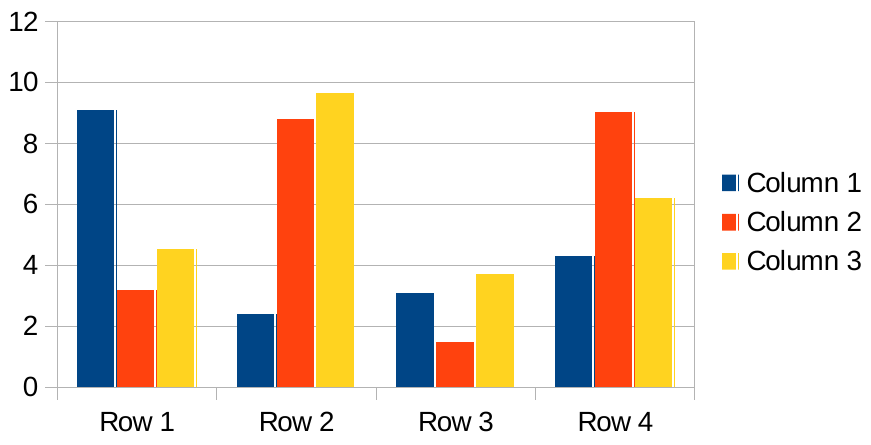


Figure 2:
   Element type: figure
   Confidence: 0.91
   Bounding box: [424, 1610, 1296, 2054]
   Image size: (872, 444)


         Column 1   Column 2   Column 3  
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  Row 1   9          3.2        4.5       
  Row 2   2.4        8.8        9.6       
  Row 3   3.1        1.5        3.7       
  Row 4   4.3        9          6.2

   Displaying figure 2:


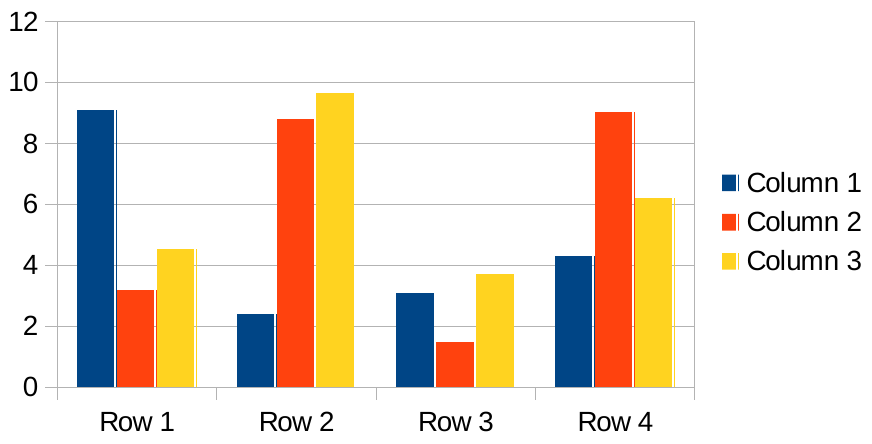


Figure 3:
   Element type: figure
   Confidence: 0.96
   Bounding box: [153, 152, 1500, 1053]
   Image size: (1347, 901)


Here is the information extracted from the image:                                                                  

Keyboard Layout                                                                                                    

 • Top Row:                                                                                                        
    • % 3 5 8 0 P                                                                                                  
 • QWERTY Row:                                                                                                     
    • Q W E T Y U                                                                                                  
 • ASDF Row:                                                                                                       
    • A S D F G J K L                                                                                              
 • ZXCV Row:                                                                                                       
    • Z X C V B N                                                                                                  
 • Modifier Keys:                                                                                                  
    • tab                                                                                                          
    • caps lock                                                                                                    
    • shift                                                                                                        
    • fn control option command                                                                                    
    • delete                                                                                                       
    • enter return                                                                                                 
    • shift                                                                                                        
    • command option

   Displaying figure 3:


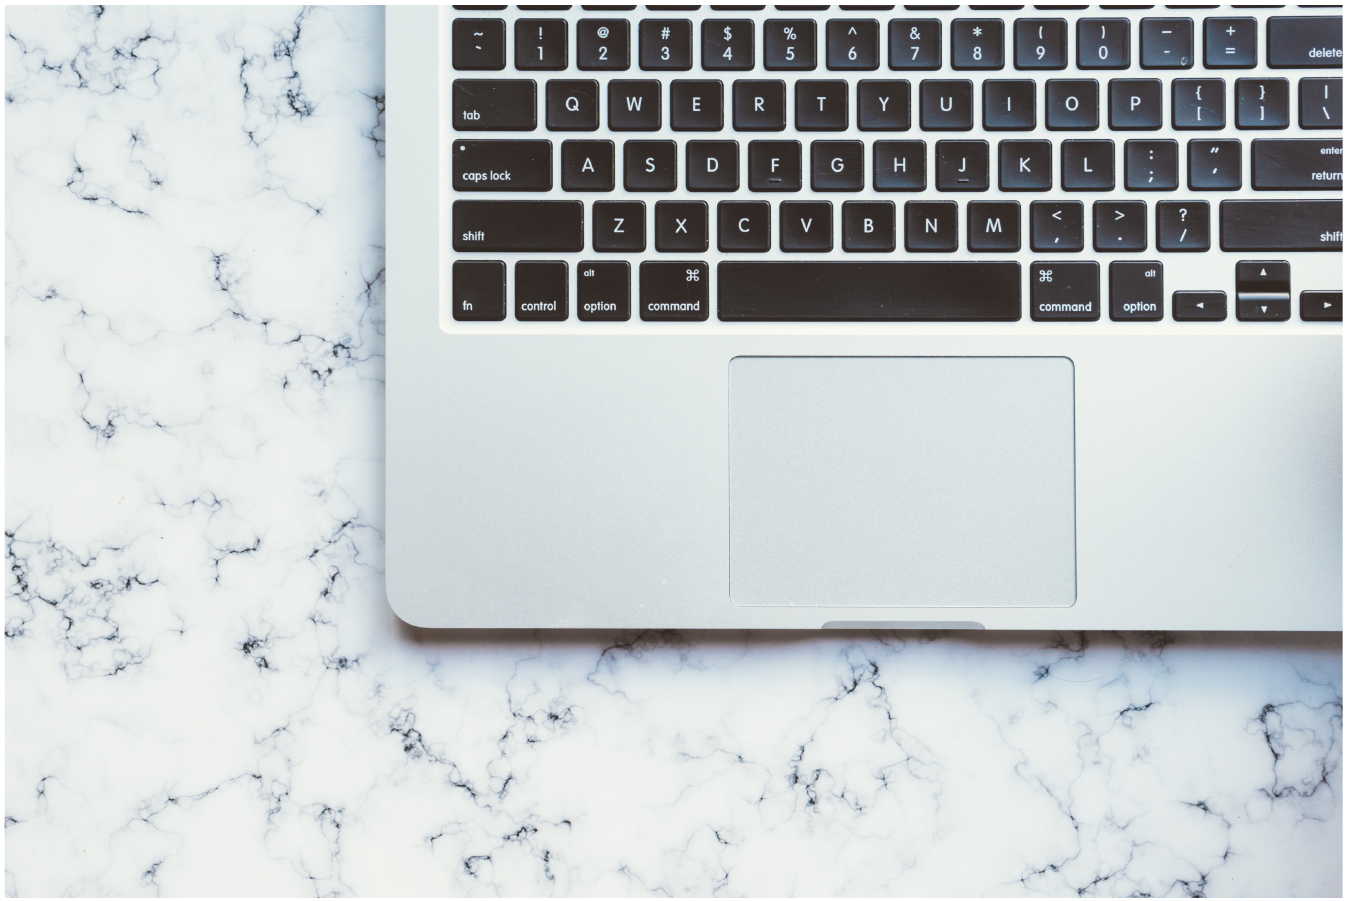

In [10]:
# Examine figures in the document

print(f"🖼️ Found {len(doc.figures)} figures in the document:")

for i, figure in enumerate(doc.figures[:3]):  # Show first 3 figures
    print(f"\nFigure {i+1}:")
    print(f"   Element type: {figure.element_type}")
    print(f"   Confidence: {figure.confidence:.2f}")
    print(f"   Bounding box: {figure.bbox}")
    print(f"   Image size: {figure.image.size}")
    
    # Display AI-generated description
    if figure.markdown:
        md=RichMarkdown(figure.markdown)
        console.print(md, crop=False)
    
    # Display the figure image
    print(f"   Displaying figure {i+1}:")
    display(figure.image)
        

### Working with Tables

Tables are automatically detected and their structure is analyzed. DocSearch can extract both the visual table and convert it to markdown format:


📊 Found 6 tables in the document:

Table 1:
   Element type: table
   Confidence: 0.98
   Bounding box: [153, 1046, 1501, 1582]
   Displaying table 1 image:


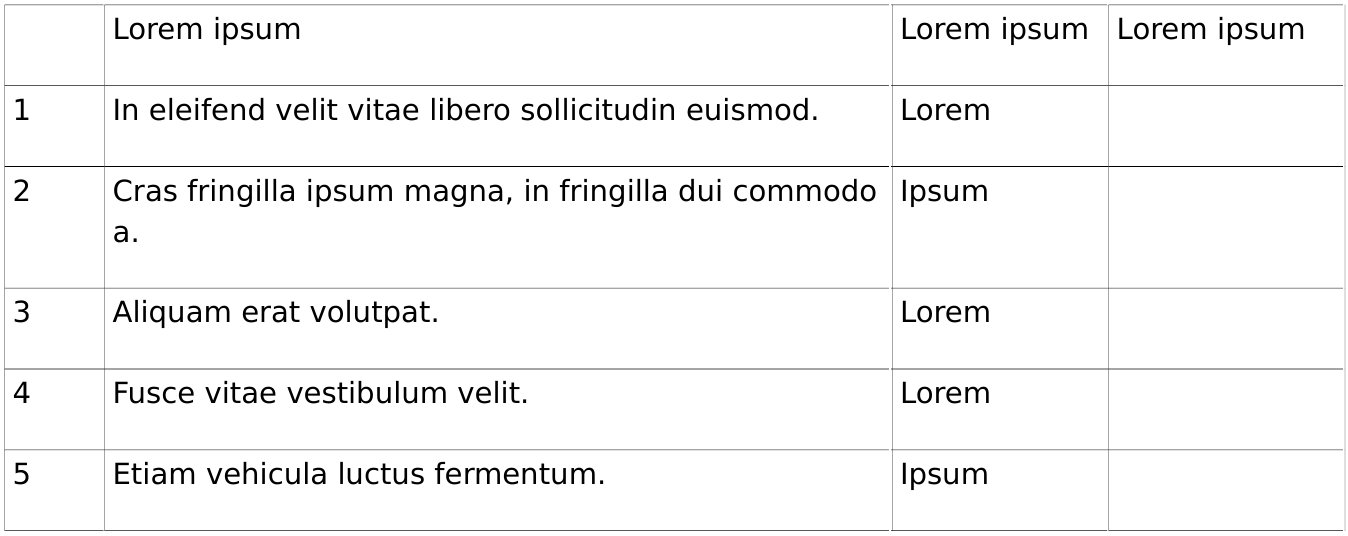

   AI-extracted table structure:


|   | Lorem ipsum                                      | Lorem ipsum   | Lorem ipsum   |
|---|--------------------------------------------------|---------------|---------------|
| 1 | In eleifend velit vitae libero sollicitudin euismod. | Lorem         |               |
| 2 | Cras fringilla ipsum magna, in fringilla dui commodo a. | Ipsum         |               |
| 3 | Aliquam erat volutpat.                           | Lorem         |               |
| 4 | Fusce vitae vestibulum velit.                    | Lorem         |               |
| 5 | Etiam vehicula luctus fermentum.                 | Ipsum         |               |


Table 2:
   Element type: table
   Confidence: 0.98
   Bounding box: [153, 1118, 1500, 1653]
   Displaying table 2 image:


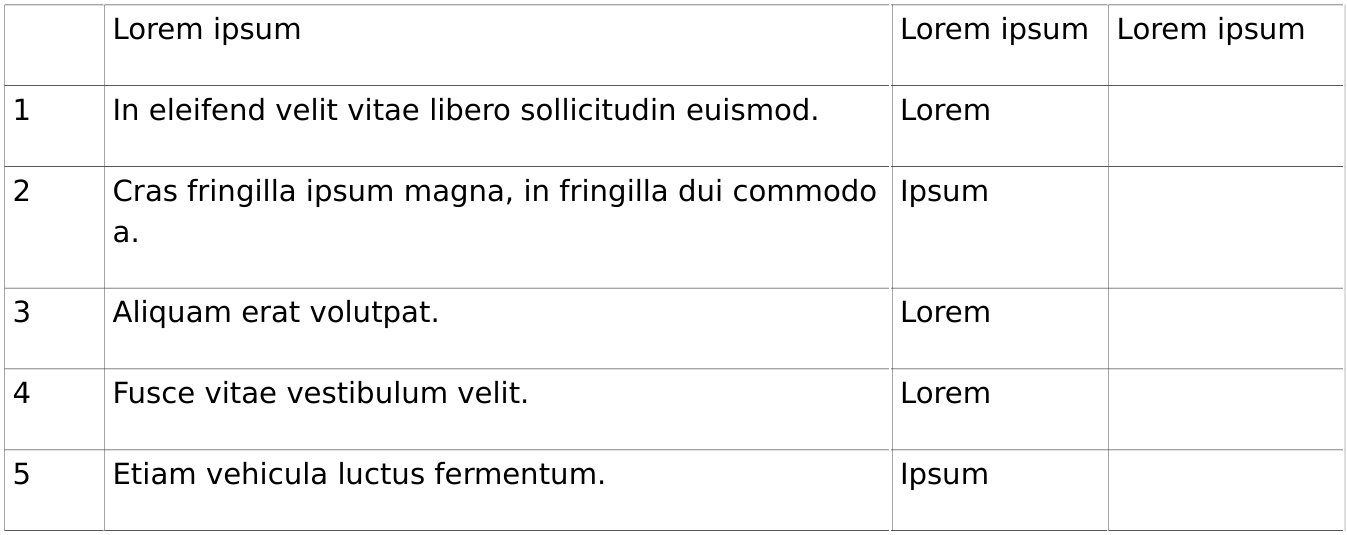

   AI-extracted table structure:


|   | Lorem ipsum                                        | Lorem ipsum | Lorem ipsum |
|---|----------------------------------------------------|-------------|-------------|
| 1 | In eleifend velit vitae libero sollicitudin euismod. | Lorem       |             |
| 2 | Cras fringilla ipsum magna, in fringilla dui commodo a. | Ipsum       |             |
| 3 | Aliquam erat volutpat.                             | Lorem       |             |
| 4 | Fusce vitae vestibulum velit.                      | Lorem       |             |
| 5 | Etiam vehicula luctus fermentum.                   | Ipsum       |             |

In [11]:
# Examine tables in the document

print(f"📊 Found {len(doc.tables)} tables in the document:")

for i, table in enumerate(doc.tables[:2]):  # Show first 2 tables
    print(f"\nTable {i+1}:")
    print(f"   Element type: {table.element_type}")
    print(f"   Confidence: {table.confidence:.2f}")
    print(f"   Bounding box: {table.bbox}")
    
    # Display table image
    print(f"   Displaying table {i+1} image:")
    display(table.image)
    
    # Display AI-extracted table markdown
    if table.markdown:
        print(f"   AI-extracted table structure:")
        display(Markdown(table.markdown))
        


### Working with Text and Titles

Text blocks and titles are extracted and processed to provide clean, readable content:

In [12]:
# Examine text and titles

print(f"📝 Text Analysis:")
print(f"   Found {len(doc.titles)} titles")
print(f"   Found {len(doc.text)} text blocks")

# Show titles
if len(doc.titles) > 0:
    print(f"\n🏷️ Document Titles:")
    for i, title in enumerate(doc.titles[:5]):  # Show first 5 titles
        print(f"   Title {i+1}: {title.markdown[:100]}...")

# Show text blocks  
if len(doc.text) > 0:
    print(f"\n📄 Text Blocks (first 3):")
    for i, text in enumerate(doc.text[:3]):  # Show first 3 text blocks
        print(f"   Text {i+1}: {text.markdown[:150]}...")
        
# Show formulas if any
if len(doc.formulas) > 0:
    print(f"\n🧮 Mathematical Formulas:")
    for i, formula in enumerate(doc.formulas[:3]):
        print(f"   Formula {i+1}: {formula.markdown}")
else:
    print(f"\n🧮 No mathematical formulas found.")


📝 Text Analysis:
   Found 50 titles
   Found 146 text blocks

🏷️ Document Titles:
   Title 1: Lorem ipsum dolor sit amet, consectetur adipiscing
elit. Nunc ac faucibus odio....
   Title 2: Lorem ipsum...
   Title 3: # Lorem ipsum...
   Title 4: # Cras fringilla ipsum magna, in fringilla dui commodo a....
   Title 5: Lorem ipsum dolor sit amet, consectetur adipiscing elit....

📄 Text Blocks (first 3):
   Text 1: Lorem ipsum dolor sit amet, consectetur adipiscing
elit. Nunc ac faucibus odio....
   Text 2: Vestibulum neque massa, scelerisque sit amet ligula eu, congue molestie mi. Praesent ut
varius sem. Nullam at porttitor arcu, nec lacinia nisi. Ut ac ...
   Text 3: Maecenas mauris lectus, lobortis et purus mattis, blandit dictum tellus....

🧮 No mathematical formulas found.


## Converting to Markdown

One of the most powerful features of DocSearch is the ability to convert the entire document to clean, structured markdown format. This preserves the logical structure and content while making it easy to work with programmatically.


In [13]:
# Generate markdown for the entire document
print("🔄 Converting document to markdown...")

# Get the markdown representation
markdown_content = doc.to_markdown()

print(f"✅ Markdown generated! ({len(markdown_content)} characters)")

# Show first 1000 characters as preview
print("\n📄 Markdown Preview (first 1000 characters):")
print("="*60)
print(markdown_content[:1000])
print("="*60)

# Save to file
output_path = DATA_DIR / "document_output.md"
doc.to_markdown(filepath=output_path)
print(f"\n💾 Full markdown saved to: {output_path}")

# Display rendered markdown preview
print("\n🎨 Rendered Markdown Preview:")
display(Markdown(markdown_content[:2000]))  # Show first 2000 characters rendered
    

🔄 Converting document to markdown...
✅ Markdown generated! (77133 characters)

📄 Markdown Preview (first 1000 characters):
# Page 1

# Page

Lorem ipsum dolor sit amet, consectetur adipiscing
elit. Nunc ac faucibus odio.

Lorem ipsum dolor sit amet, consectetur adipiscing
elit. Nunc ac faucibus odio.

Vestibulum neque massa, scelerisque sit amet ligula eu, congue molestie mi. Praesent ut
varius sem. Nullam at porttitor arcu, nec lacinia nisi. Ut ac dolor vitae odio interdum
condimentum. **Vivamus dapibus sodales ex, vitae malesuada ipsum cursus
convallis.** **Maecenas sed egestas nulla, ac condimentum orci.** Mauris diam felis,
vulputate ac suscipit et, iaculis non est. Curabitur semper arcu ac ligula semper, nec luctus
nisl blandit. Integer lacinia ante ac libero lobortis imperdiet. *Nullam mollis convallis ipsum,*
ac accumsan *nunc vehicula vitae*. Nulla eget justo in felis tristique fringilla. Morbi sit amet
tortor quis risus auctor condimentum. Morbi in ullamcorper elit. Nulla iacu

# Page 1

# Page

Lorem ipsum dolor sit amet, consectetur adipiscing
elit. Nunc ac faucibus odio.

Lorem ipsum dolor sit amet, consectetur adipiscing
elit. Nunc ac faucibus odio.

Vestibulum neque massa, scelerisque sit amet ligula eu, congue molestie mi. Praesent ut
varius sem. Nullam at porttitor arcu, nec lacinia nisi. Ut ac dolor vitae odio interdum
condimentum. **Vivamus dapibus sodales ex, vitae malesuada ipsum cursus
convallis.** **Maecenas sed egestas nulla, ac condimentum orci.** Mauris diam felis,
vulputate ac suscipit et, iaculis non est. Curabitur semper arcu ac ligula semper, nec luctus
nisl blandit. Integer lacinia ante ac libero lobortis imperdiet. *Nullam mollis convallis ipsum,*
ac accumsan *nunc vehicula vitae*. Nulla eget justo in felis tristique fringilla. Morbi sit amet
tortor quis risus auctor condimentum. Morbi in ullamcorper elit. Nulla iaculis tellus sit amet
mauris tempus fringilla.

Maecenas mauris lectus, lobortis et purus mattis, blandit dictum tellus.

- *Nulla facilisi.*

- Aenean congue fringilla justo ut aliquam.

- Maecenas non lorem quis tellus placerat varius.
- *Nulla facilisi*.
- Aenean congue fringilla justo ut aliquam.
- _Mauris id ex erat_. Nunc vulputate neque vitae justo facilisis, non condimentum ante sagittis.
- Morbi viverra semper lorem nec molestie.
- Maecenas tincidunt est efficitur ligula euismod, sit amet ornare est vulputate.

- Mauris id ex erat. Nunc vulputate neque vitae justo facilisis, non condimentum ante sagittis.

- Morbi viverra semper lorem nec molestie.

- Maecenas non lorem quis tellus placerat varius.

Lorem ipsum

# Lorem ipsum

necenas tincidunt est efficitur ligula euismod, sit amet ornare est vulputate.

Here is a bar chart with 4 rows and 3 columns. 

**Data:**

|       | Column 1 | Column 2 | Column 3 |
| :---- | :------- | :------- | :------- |
| Row 1 | 9        | 3        | 4.5      |
| Row 2 | 2.3      | 8.8      | 9.6      |
| Row 3 | 3        | 1.5      | 3.7      |
| Row 4 | 4.3      | 9  

## Working with Individual Pages

You can also work with individual pages to get more granular control over the content:


📄 Page 1 Analysis:
   Elements on page: 15
   Figures: 2
   Tables: 0
   Text blocks: 10
   Titles: 3

🖼️ Original Page Image:


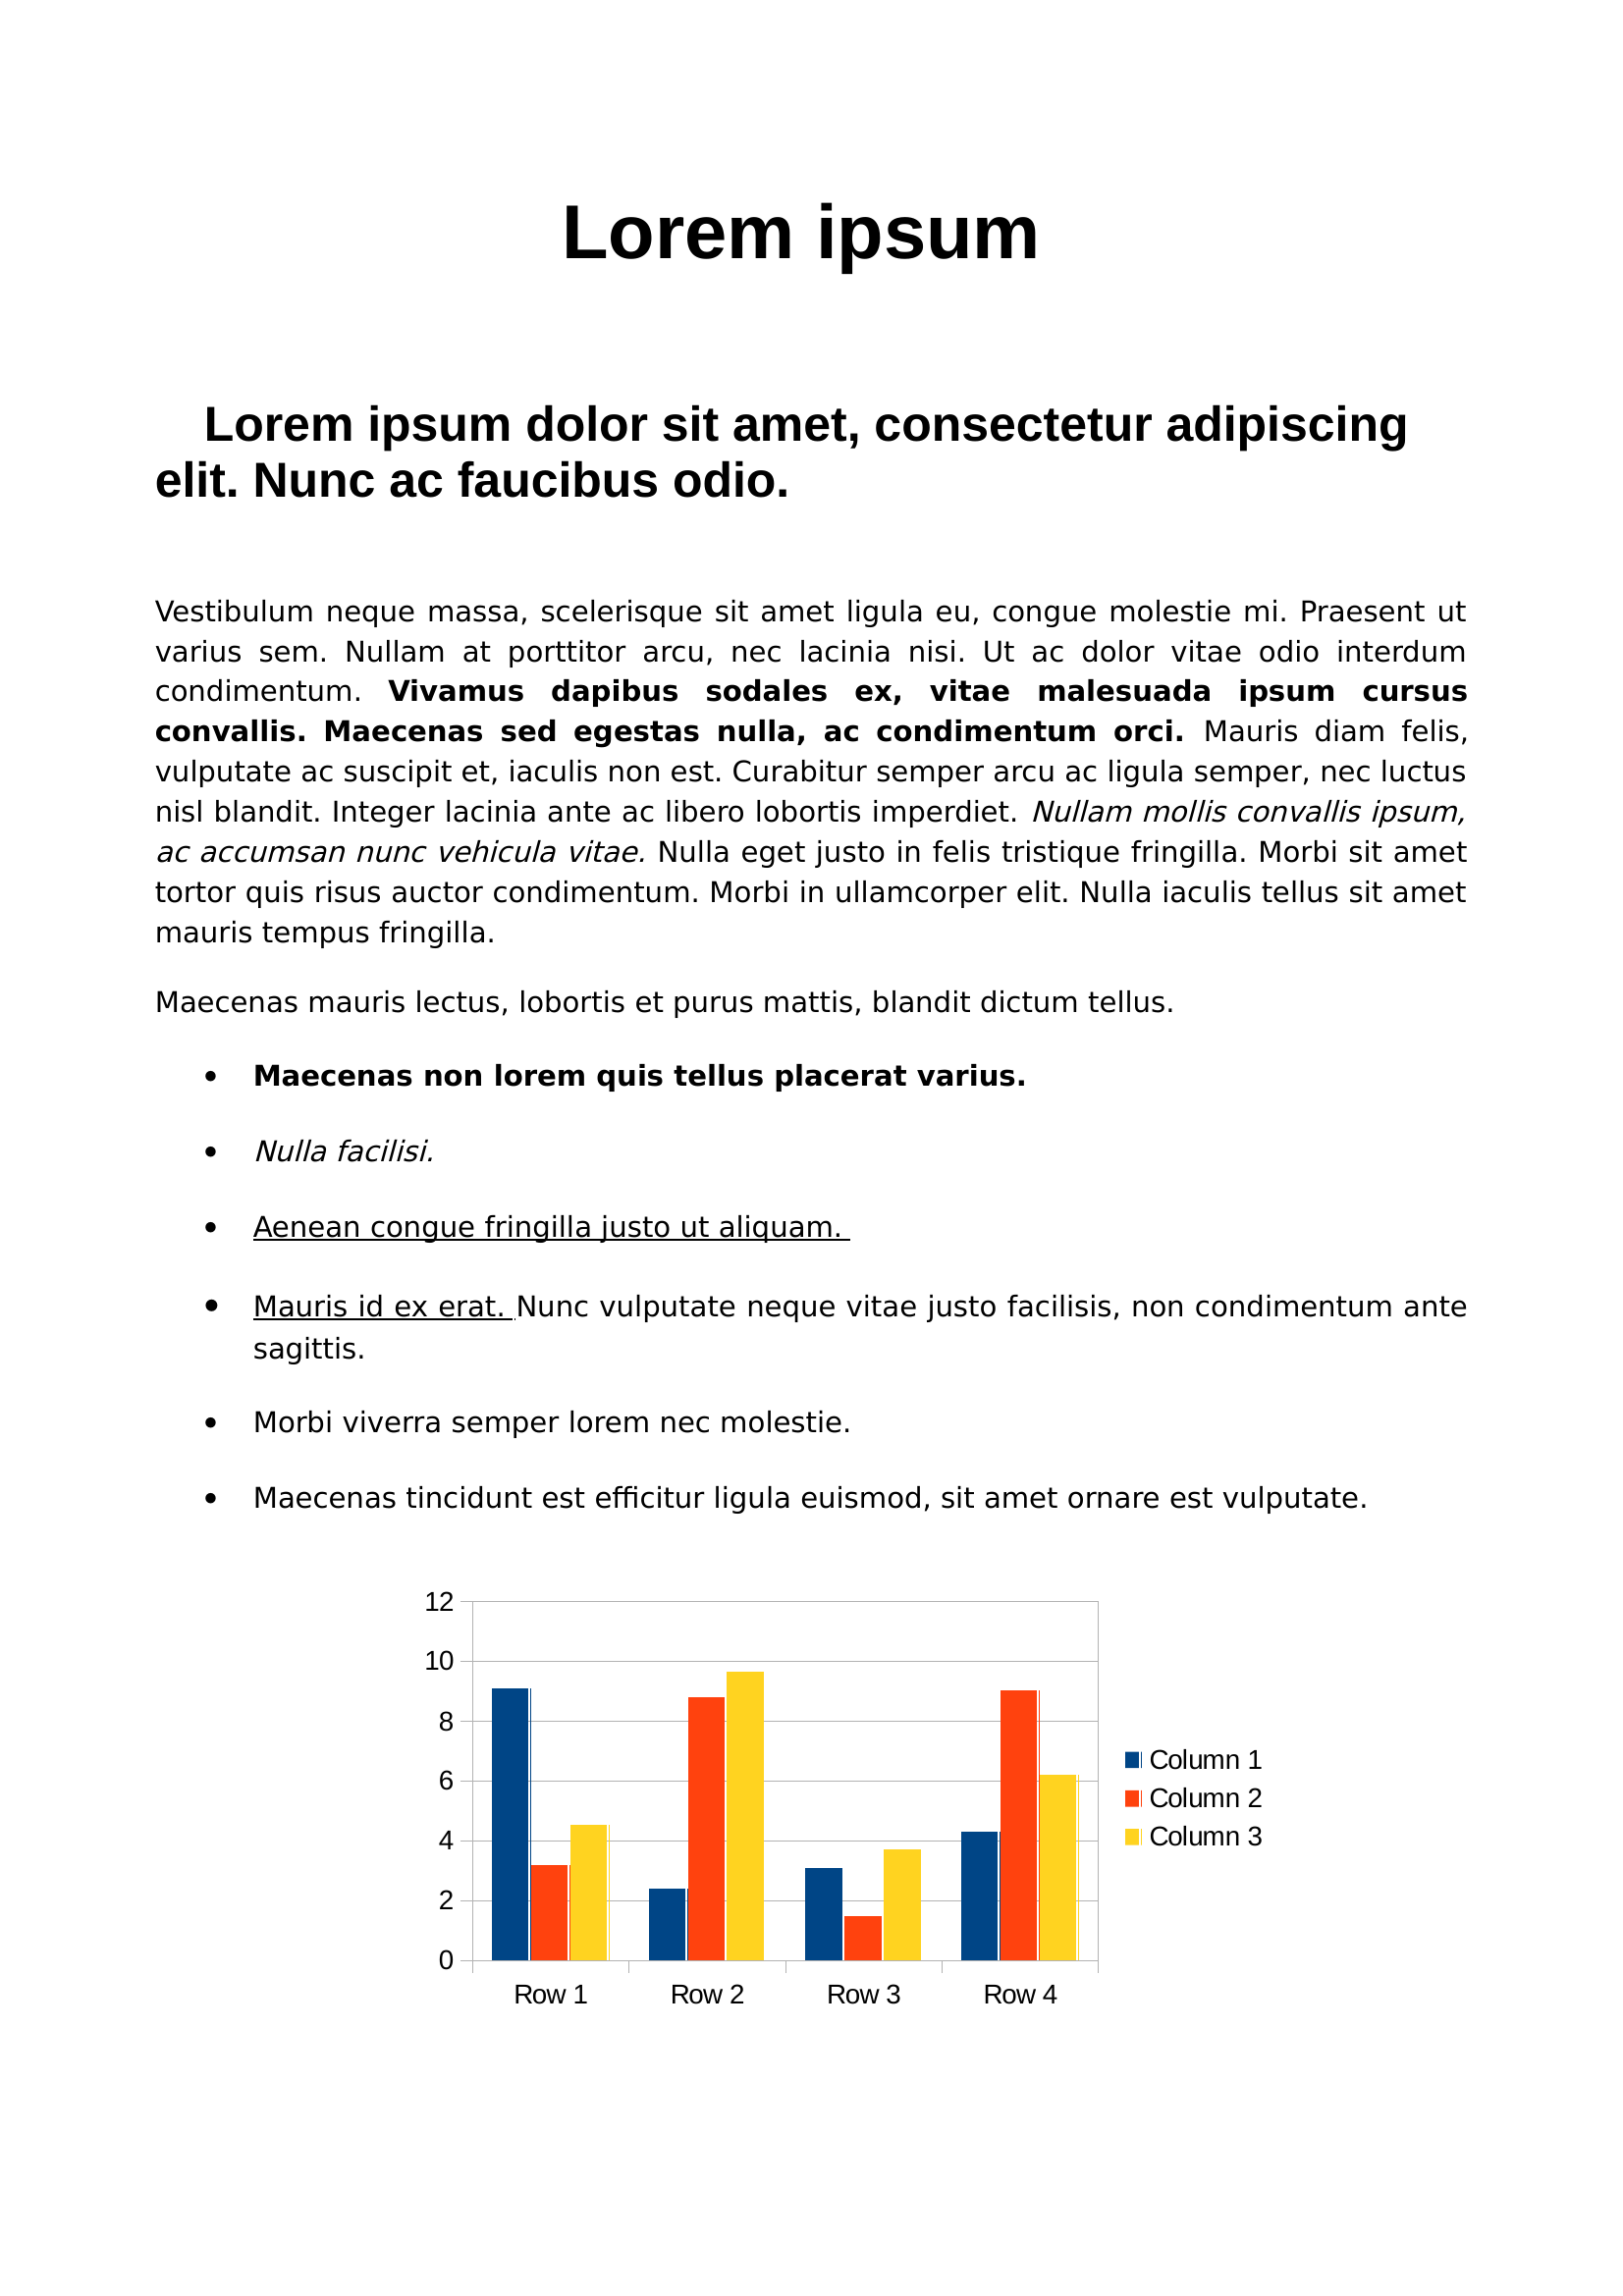


🎯 Annotated Page (with detected elements):


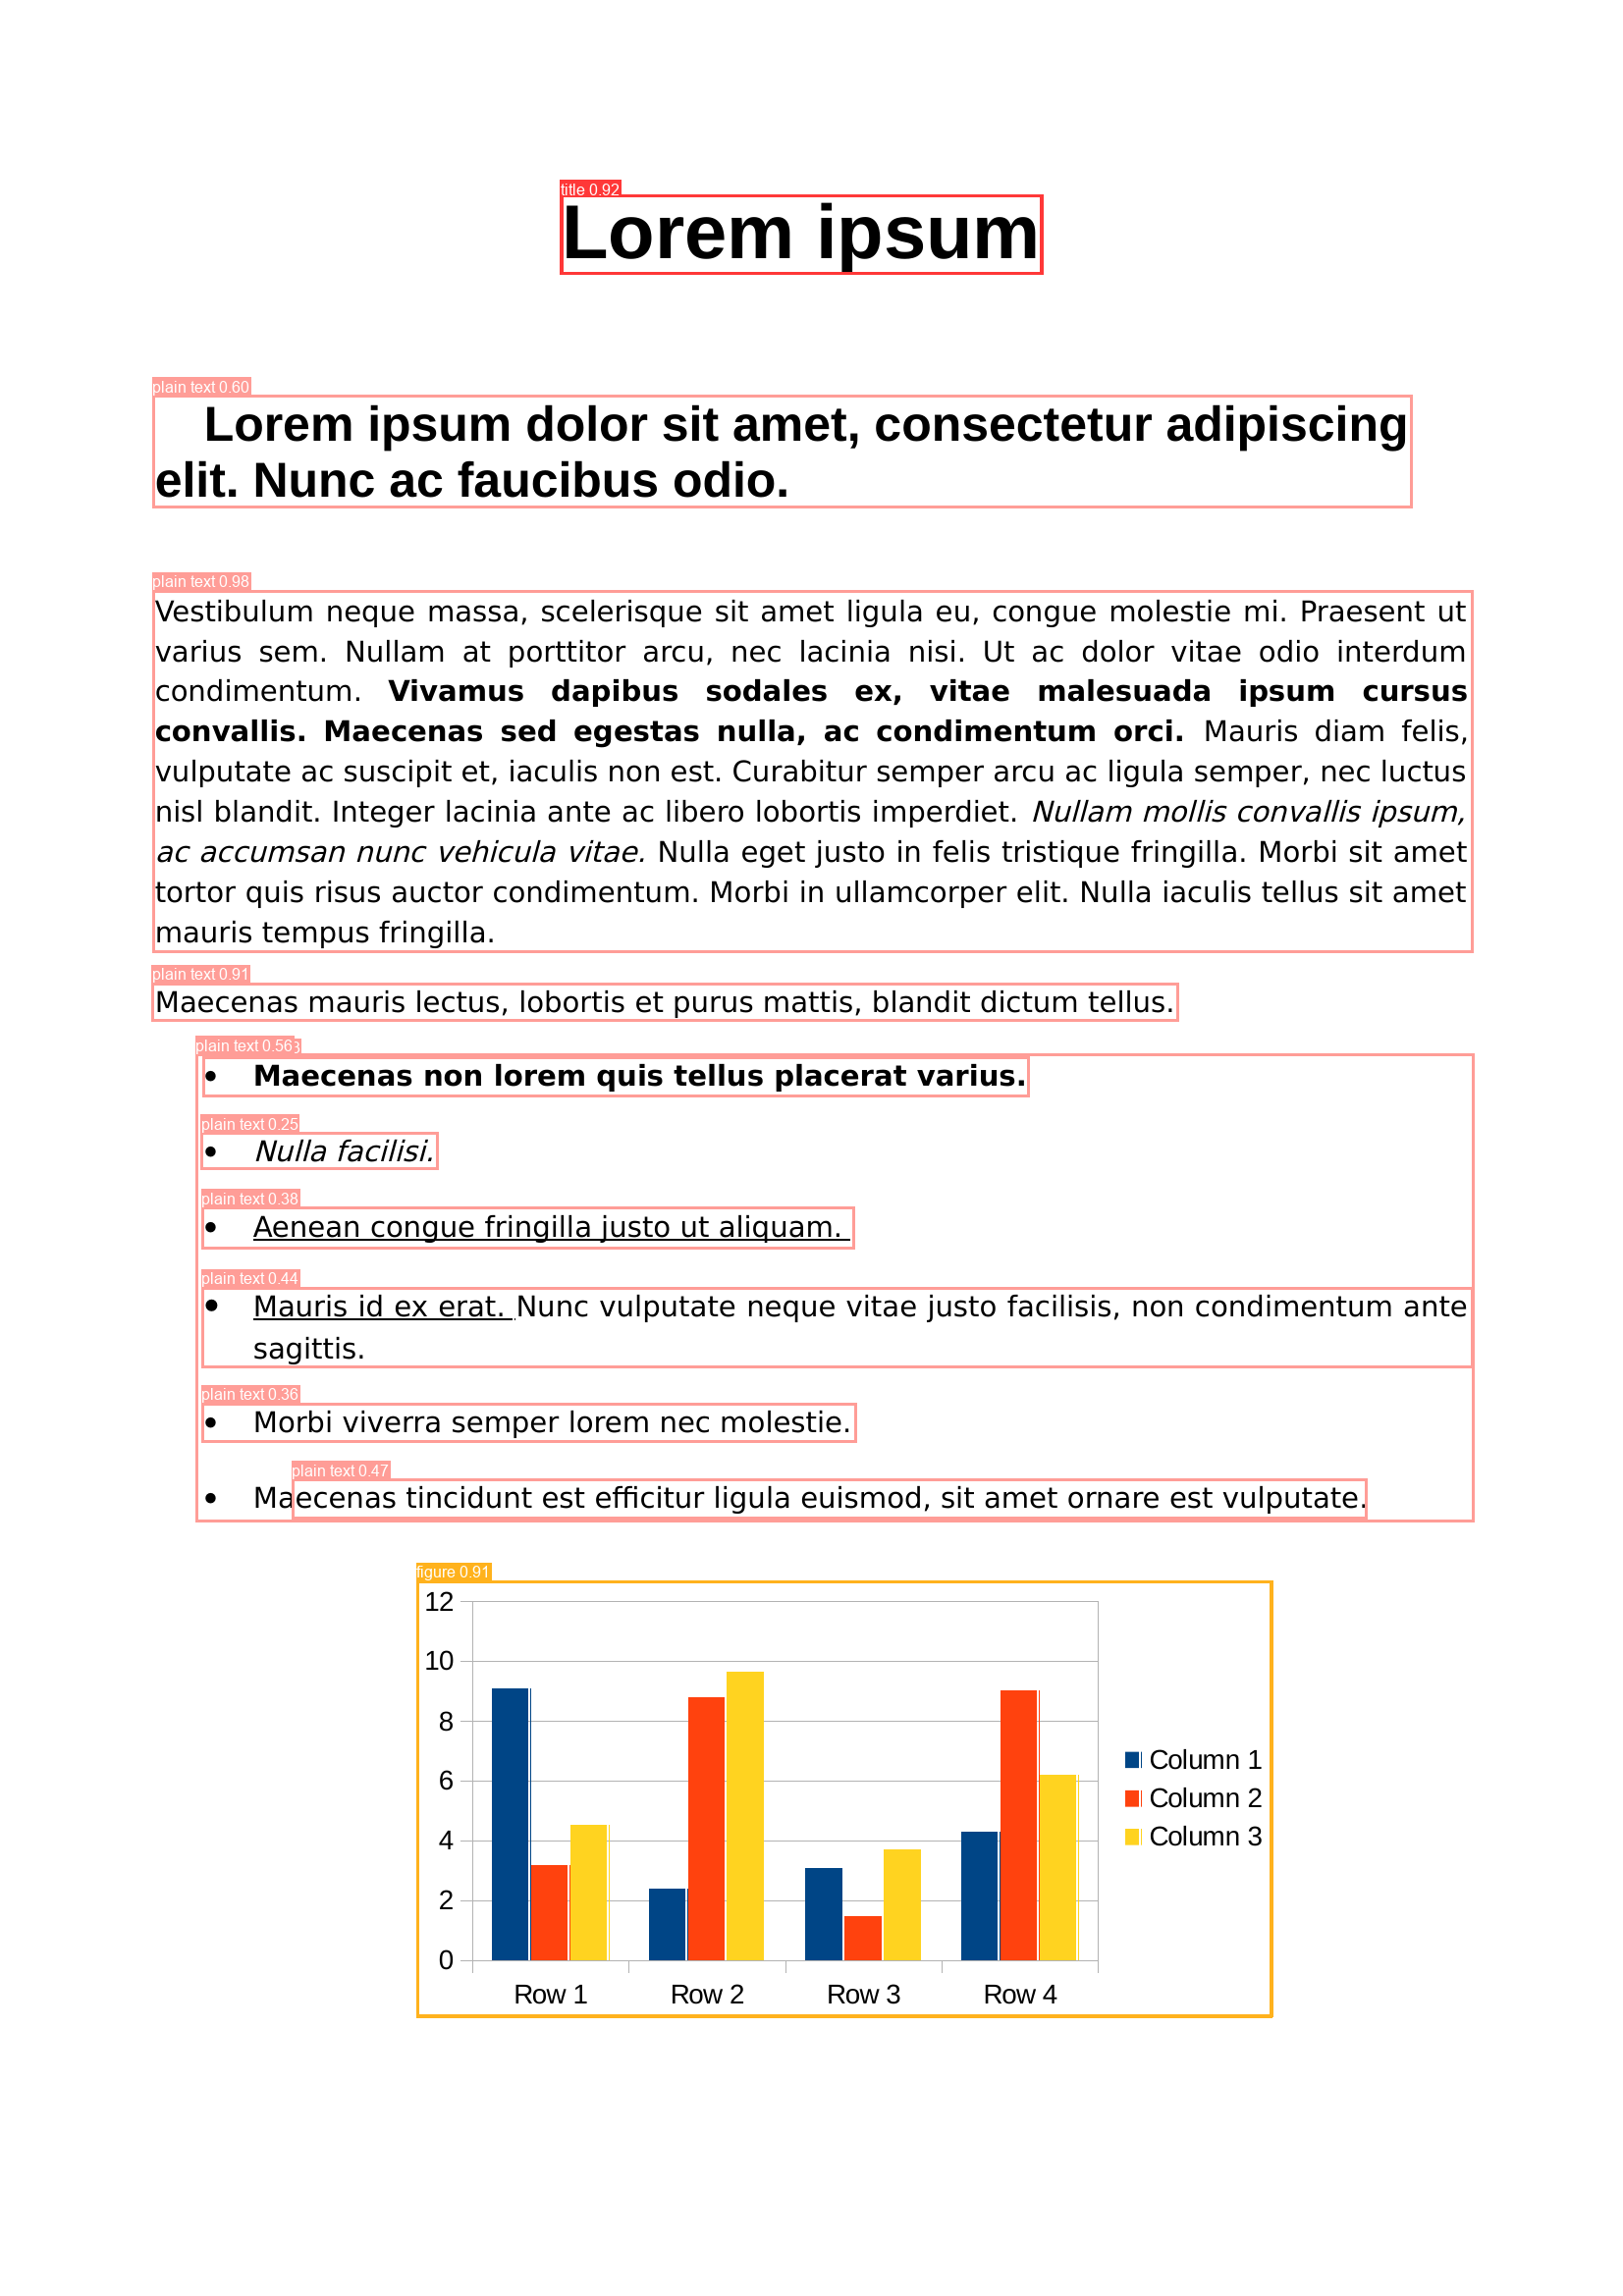


📝 Page Markdown Length: 2759 characters

🖼️ First figure from page 1:


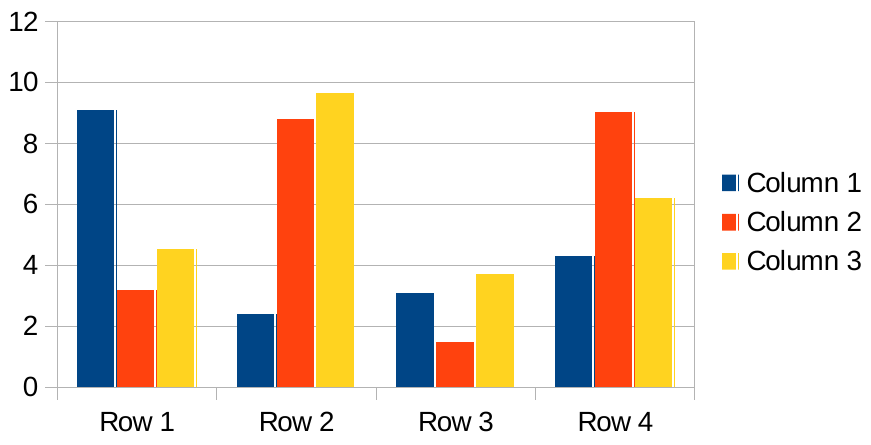

In [14]:
# Get the first page
first_page = doc[0]  # or doc.get_page(1) for 1-indexed access

print(f"📄 Page 1 Analysis:")
print(f"   Elements on page: {len(first_page.elements)}")
print(f"   Figures: {len(first_page.figures)}")
print(f"   Tables: {len(first_page.tables)}")
print(f"   Text blocks: {len(first_page.text)}")
print(f"   Titles: {len(first_page.titles)}")

# Display the original page image
print(f"\n🖼️ Original Page Image:")
display(first_page.image)

# Display the annotated page (with bounding boxes)
if first_page.annotated_image:
    print(f"\n🎯 Annotated Page (with detected elements):")
    display(first_page.annotated_image)

# Get page-specific content
page_markdown = first_page.to_markdown()
print(f"\n📝 Page Markdown Length: {len(page_markdown)} characters")

# Show specific content types from this page
if len(first_page.figures) > 0:
    print(f"\n🖼️ First figure from page 1:")
    display(first_page.figures[0].image)
        

## Saving and Exporting

DocSearch provides multiple ways to save and export your processed document data:

In [17]:
# Save and export document data
output_dir = DATA_DIR / "document_export"
output_dir.mkdir(exist_ok=True)

print("💾 Saving document data in multiple formats...")

# 2. Save as Markdown
md_path = output_dir / "document.md"
doc.to_markdown(md_path)
print(f"✅ Markdown saved: {md_path}")

# 3. Save as PyArrow/Parquet (for data science workflows)
parquet_path = output_dir / "document.parquet"
doc.to_pyarrow(parquet_path)
print(f"✅ Parquet saved: {parquet_path}")

# 5. Get document as dictionary for programmatic use
doc_dict = doc.to_dict(include_images=False)
print(f"✅ Document dictionary created with {len(doc_dict['pages'])} pages")

print(f"\n📁 All exports saved to: {output_dir}")

💾 Saving document data in multiple formats...
✅ Markdown saved: c:\Users\lllang\Desktop\Current_Projects\DocRag\examples\data\document_export\document.md
✅ Parquet saved: c:\Users\lllang\Desktop\Current_Projects\DocRag\examples\data\document_export\document.parquet
✅ Document dictionary created with 30 pages

📁 All exports saved to: c:\Users\lllang\Desktop\Current_Projects\DocRag\examples\data\document_export
